In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv(r'sentiment_labelled_sentences\amazon_cells_labelled.txt', sep='\t', header=None, names=('sentence', 'score'))
data.head()

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [11]:
# Getting the word counts in sentences to get an idea of what words we can use the most as keywords.
word_split=data['sentence'].str.split()
dicti={}
for sentence in word_split:
    for word in sentence:
        try:
            dicti[word]=dicti[word]+sentence.count(word)
        except KeyError:
            dicti[word]=1
word_count=pd.DataFrame(list(dicti.items()), columns=['Words', 'Count'])
word_count.sort_values(by=['Count'], ascending=False)

,Words,Count
12,the,654
75,and,397
15,I,393
2,is,308
18,a,265


In [4]:
#Key words or positive_words are given below
positive_words = ['excellent', 'great',  'awesome', 'positive', 'good', 'satisfied', 'super', 
                  'best', 'fine', 'sweet', 'recommend']
for key in positive_words:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    data[str(key)] = data.sentence.str.contains(
        str(key),
        case=False
    )
data.head()

,sentence,score,excellent,great,awesome,positive,good,satisfied,super,best,fine,sweet,recommend
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,True,False,False,False,True,False,False,False,False,False,False
2,Great for the jawbone.,1,False,True,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,True,False,False,False,False,False,False,False,False,False


AxesSubplot(0.125,0.125;0.62x0.755)
Number of mislabeled points out of a total 1000 points : 301
The model accurately classified as postive/negative by   69.9


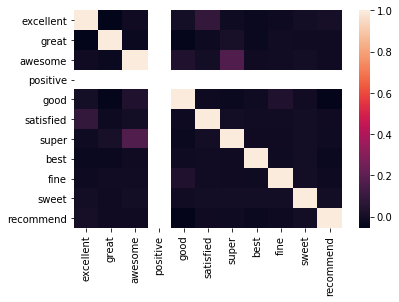

In [5]:
data['score'] = np.where(data['score']==1, 'Positive', 'Negative')

print (sns.heatmap(data.corr()))
data_input = data[positive_words]
target = data['score']
# data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_input, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_input)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_input.shape[0],
    (target != y_pred).sum()
))
print ("The model accurately classified as postive/negative by  ", (1-((target != y_pred).sum()/data_input.shape[0]))*100)

In [6]:
data_imdb = pd.read_csv(r'sentiment_labelled_sentences\imdb_labelled.txt', delimiter= '\t', header=None, names=('sentence', 'score'))
data_imdb.head()

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [7]:
#Key words or positive_words are given below
positive_words = ['excellent', 'great', 'positive', 'awesome', 'good', 'super', 
                  'best', 'fine', 'sweet', 'recommend']
for key in positive_words:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    data_imdb[str(key)] = data_imdb.sentence.str.contains(
        str(key),
        case=False
    )
data_imdb.head()

,sentence,score,excellent,great,positive,awesome,good,super,best,fine,sweet,recommend
0,"A very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,False,False,False,False,False,False,True,False,False,False


AxesSubplot(0.125,0.125;0.62x0.755)
Number of mislabeled points out of a total 748 points : 316
The model accurately classified as postive/negative by   57.75401069518716


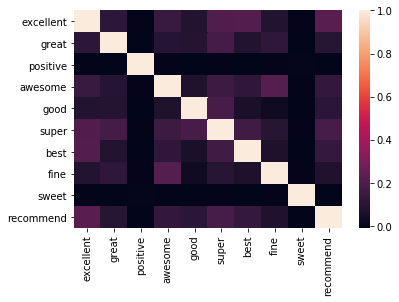

In [8]:
data_imdb['score'] = np.where(data_imdb['score']==1, 'Positive', 'Negative')

print (sns.heatmap(data_imdb.corr()))
data_input = data_imdb[positive_words]
target = data_imdb['score']
# data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_input, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_input)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_input.shape[0],
    (target != y_pred).sum()
))
print ("The model accurately classified as postive/negative by  ", (1-((target != y_pred).sum()/data_input.shape[0]))*100)

AxesSubplot(0.125,0.125;0.62x0.755)
Number of mislabeled points out of a total 1000 points : 354
The model accurately classified as postive/negative by   64.60000000000001


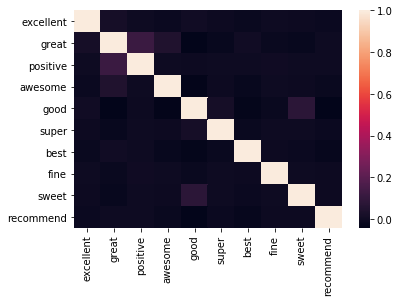

In [9]:
# conclusion: the keywords donot translate into a good NB classifier and we get only 57% accuracy
# compared to the amazon classifier earlier.so this model is not widely applicable
data_yelp = pd.read_csv(r'sentiment_labelled_sentences\yelp_labelled.txt', delimiter= '\t', header=None, names=('sentence', 'score'))
data_yelp.head()
#Key words or positive_words are given below
positive_words = ['excellent', 'great', 'positive', 'awesome', 'good', 'super', 
                  'best', 'fine', 'sweet', 'recommend']
for key in positive_words:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    data_yelp[str(key)] = data_yelp.sentence.str.contains(
        str(key),
        case=False
    )
data_yelp.head()
data_yelp['score'] = np.where(data_yelp['score']==1, 'Positive', 'Negative')

print (sns.heatmap(data_yelp.corr()))
data_input = data_yelp[positive_words]
target = data_yelp['score']
# data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_input, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_input)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_input.shape[0],
    (target != y_pred).sum()
))
print ("The model accurately classified as postive/negative by  ", (1-((target != y_pred).sum()/data_input.shape[0]))*100)

In [10]:
# conclusion: the keywords donot translate into a good NB classifier and we get only 64% accuracy
# compared to the other two classifiers earlier.so this model is not widely applicable at all.